In [3]:
import pandas as pd
import numpy as np
import  matplotlib.pyplot as plt

# Consumer & Visitor Insights For Neighborhoods数据预处理

In [153]:
data=pd.read_csv("../datamining_dataset/cbg_patterns.csv")

In [154]:
data.head()

,census_block_group,date_range_start,date_range_end,raw_visit_count,raw_visitor_count,visitor_home_cbgs,visitor_work_cbgs,distance_from_home,related_same_day_brand,related_same_month_brand,top_brands,popularity_by_hour,popularity_by_day
0,1.005951e+10,1538352000,1541030400,75122.0,18314.0,"{""010059501003"":127,""010059509001"":111,""010059...","{""010059501003"":109,""010810407002"":62,""0108104...",194724.0,"[""Chick-fil-A"",""mcdonalds"",""Marathon Petroleum...","[""walmart"",""mcdonalds"",""Dollar General"",""Chick...","[""CrossFit"",""Health Mart"",""Coldwell Banker""]","[2617,2457,2403,2519,2646,3007,3886,7566,5508,...","{""Monday"":12000,""Tuesday"":12224,""Wednesday"":10..."
1,1.009051e+10,1538352000,1541030400,95649.0,38942.0,"{""010730113021"":210,""010090506022"":205,""010090...","{""010890111001"":271,""010730045001"":269,""010439...",120587.0,"[""Shell Oil"",""mcdonalds"",""Chick-fil-A"",""Chevron""]","[""walmart"",""mcdonalds"",""Shell Oil"",""Chick-fil-...",[],"[6556,6325,6222,6355,6586,7350,8568,8099,7378,...","{""Monday"":12125,""Tuesday"":12984,""Wednesday"":12..."
2,1.047957e+10,1538352000,1541030400,14009.0,3039.0,"{""010479567011"":67,""010479567021"":60}","{""010479567021"":52}",67774.0,"[""Dollar General""]","[""walmart"",""Dollar General"",""mcdonalds"",""Chevr...","[""Dollar General""]","[807,790,796,786,851,951,1134,1797,1355,1241,1...","{""Monday"":2314,""Tuesday"":2340,""Wednesday"":2195..."
3,1.069040e+10,1538352000,1541030400,128169.0,25418.0,"{""010690402013"":370,""010690402011"":322,""010690...","{""010690402024"":313,""010690415004"":203,""010450...",42684.0,"[""Chick-fil-A"",""Sam's Club"",""Dollar General"",""...","[""walmart"",""Dollar General"",""mcdonalds"",""Marat...","[""Chick-fil-A"",""Sam's Club"",""Olive Garden"",""mc...","[2121,1828,1784,1704,1861,2373,3730,7497,7093,...","{""Monday"":21141,""Tuesday"":21143,""Wednesday"":17..."
4,1.073011e+10,1538352000,1541030400,51453.0,9499.0,"{""010090507001"":183,""010730113021"":167,""010730...","{""010730045001"":140,""010730027001"":123,""010730...",18878.0,"[""Chevron"",""Daylight Donuts"",""walmart""]","[""walmart"",""Chevron"",""Dollar General"",""Shell O...","[""Chevron"",""CrossFit""]","[3804,3716,3686,3672,3735,4115,4855,5946,4526,...","{""Monday"":8402,""Tuesday"":8414,""Wednesday"":8550..."


人口普查分组(CBG)是美国人口普查局报告数据的最细粒度级别。
SafeGraph通过分析大量GPS移动数据，得出了CBG的普及程度或到达CBG的距离。
我们还将这些GPS数据与我们的数据集(500万个建筑足迹)结合起来，用于美国的景点(安全图地点)，以确定对商店或餐馆等地点的访问。我们使用这些访问计数来获得消费者的洞察力，例如在CBG访问的顶级品牌(如麦当劳)。

census_block_group:人口普查区组唯一的12位FIPS码。请注意，有些cbg有前导零。
date_range_start:测量周期的开始时间作为时间戳(UTC秒)。
date_range_end:测量周期的结束时间作为时间戳(UTC秒)。
raw_visit_count：在日期范围内，我们的小组访问该CBG的次数。
raw_visitor_count：在日期范围内，我们的小组访问POI的独立访问人数。
visitor_home_cbgs：本列列出访问了列census_block_group(目的地CBG)中的目的地的设备的所有原始主CBG。映射到每个home CBG的数字表示在此期间访问                census_block_group的从这个home CBG观察到的访问者数量。不包括访问census_block_group少于50人的家庭cbg。
visitor_work_cbgs：本列列出访问了列census_block_group(目的CBG)中某个目的地的设备的所有工作位置CBG。映射到每个工作CBG的数字表示在此期间访问                census_block_group的使用此工作CBG观察到的访问者数量。访问census_block_group的访客少于50人的工作cbg不包括在内。
distance_from_home：从家到CBG的游客(我们已确定其家的游客)的距离中位数(米)。
related_same_day_brand：访问CBG的用户在访问CBG的同一天访问的品牌，这些品牌与SafeGraph全国平均水平的客户重叠至少有5%的差异。按实力排序，并以前                 十名品牌为限。
related_same_month_brand：访问CBG的客户在访问CBG的同一个月访问的品牌，其中重叠的客户与SafeGraph全国平均水平至少有5%的差异。按实力排序，并以前                  十名品牌为限。
top_brands：在此期间访问的顶级品牌列表。仅限于十大品牌。	
popularity_by_hour：	在当地时间范围内，每天的小时数与每小时的访问量之间的映射。
popularity_by_day：在日期范围内，将星期几映射为每天的访问量(当地时间)。

(array([5.2225e+04, 8.4020e+03, 4.4100e+03, 2.8990e+03, 1.6890e+03,
        7.1000e+02, 1.7800e+02, 3.8000e+01, 5.0000e+00, 1.0000e+00]),
 array([ 1. ,  3.9,  6.8,  9.7, 12.6, 15.5, 18.4, 21.3, 24.2, 27.1, 30. ]),
 <a list of 10 Patch objects>)

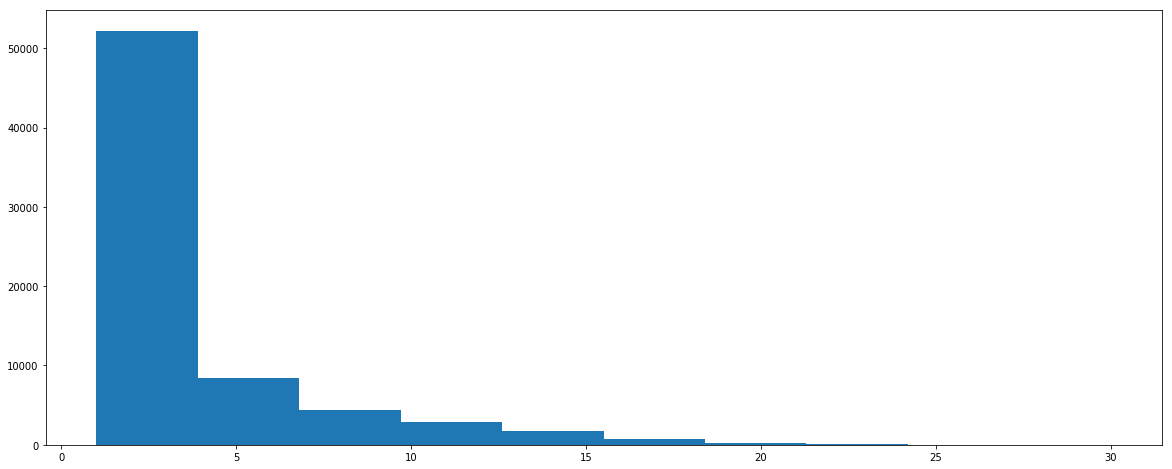

In [155]:
#统计distance_from_home一列每个可能聚会的频数
distance=data.distance_from_home.value_counts()
plt.figure(figsize=(20, 8))
plt.hist(distance)

In [156]:
#给出raw_visit_count一列的五数概括
data.raw_visit_count.describe()

count    2.206290e+05
mean     4.793066e+04
std      6.252655e+04
min      6.000000e+01
25%      1.704200e+04
50%      3.064000e+04
75%      5.667800e+04
max      7.179900e+06
Name: raw_visit_count, dtype: float64

In [157]:
print(data.isnull().sum()) #统计每一列缺失值的个数

census_block_group            1
date_range_start              0
date_range_end                0
raw_visit_count             106
raw_visitor_count           106
visitor_home_cbgs             0
visitor_work_cbgs             0
distance_from_home          217
related_same_day_brand        0
related_same_month_brand      0
top_brands                    0
popularity_by_hour            0
popularity_by_day             0
dtype: int64


In [158]:
#对于census_block_group缺失的数据，由于census_block_group是人口普查区组唯一的12位FIPS码，无法进行填补，故选择直接将该行数据剔除
data[data['census_block_group'].isnull()]  #索引为220734

,census_block_group,date_range_start,date_range_end,raw_visit_count,raw_visitor_count,visitor_home_cbgs,visitor_work_cbgs,distance_from_home,related_same_day_brand,related_same_month_brand,top_brands,popularity_by_hour,popularity_by_day
220734,NaN,1538352000,1541030400,NaN,NaN,{},{},NaN,[],[],[],[],{}


In [159]:
data.drop(220734,inplace=True)#将索引为220734的数据剔除

In [160]:
#对于raw_visit_count和raw_visitor_count两列的缺失值，分别使用他们的均值进行填充
raw_visit_count_mean=np.ceil( np.mean(data.raw_visit_count) )
data.raw_visit_count=data.raw_visit_count.fillna(raw_visit_count_mean)
raw_visitor_count_mean=np.ceil( np.mean(data.raw_visitor_count) )
data.raw_visitor_count=data.raw_visitor_count.fillna(raw_visitor_count_mean)

In [161]:
#对于distance_from_home一列使用最高频率值来填补缺失值
data.distance_from_home.value_counts()

8345.0      30
8198.0      27
7422.0      27
8073.0      27
8337.0      25
8148.0      25
7579.0      24
8391.0      24
7494.0      24
8172.0      24
9230.0      23
7873.0      23
10270.0     23
7791.0      23
8202.0      23
6826.0      23
8802.0      23
8282.0      23
7485.0      23
8310.0      23
7469.0      23
7900.0      23
8554.0      22
7037.0      22
6817.0      22
8334.0      22
8038.0      22
10130.0     22
6692.0      22
8293.0      22
            ..
38271.0      1
114093.0     1
325295.0     1
56666.0      1
114089.0     1
250454.0     1
71200.0      1
114101.0     1
162670.0     1
228242.0     1
228225.0     1
46672.0      1
46083.0      1
36398.0      1
456473.0     1
40675.0      1
162699.0     1
114117.0     1
81347.0      1
128311.0     1
128313.0     1
162683.0     1
456433.0     1
81340.0      1
38270.0      1
57053.0      1
142012.0     1
29289.0      1
191089.0     1
188528.0     1
Name: distance_from_home, Length: 70557, dtype: int64

In [162]:
data.distance_from_home=data.distance_from_home.fillna(8345.0) #使用最高频率值进行填充

In [163]:
#至此所有缺失值填补完毕
print(data.isnull().sum())

census_block_group          0
date_range_start            0
date_range_end              0
raw_visit_count             0
raw_visitor_count           0
visitor_home_cbgs           0
visitor_work_cbgs           0
distance_from_home          0
related_same_day_brand      0
related_same_month_brand    0
top_brands                  0
popularity_by_hour          0
popularity_by_day           0
dtype: int64


{'whiskers': [<matplotlib.lines.Line2D at 0x1e9f0660898>,
 'caps': [<matplotlib.lines.Line2D at 0x1e9f066a278>,
 'boxes': [<matplotlib.lines.Line2D at 0x1e9f0660748>],
 'medians': [<matplotlib.lines.Line2D at 0x1e9f066ab38>],
 'fliers': [<matplotlib.lines.Line2D at 0x1e9f066af98>],
 'means': []}

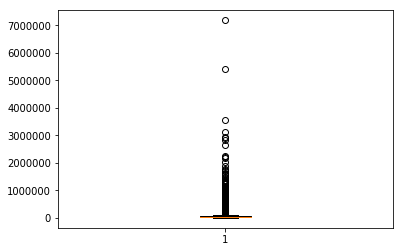

In [164]:
#绘制盒图
plt.boxplot(data.raw_visit_count)

(array([ 3972.,  4178., 25359.,  3532.,  3159., 11892.,  5533.,  1836.,
        14505.,  4981.,  6756.,  4359.,  6434., 11520.,  6670.,  2475.,
         2758.,  7769., 21618.,  9810.,  5599.,  9740.,  3874.,  4779.,
        17501.,  2176.,  3678.,  6375.,  4899.,     0.,    41.,     0.,
            0.,   218.,     0.,    55.,  2594.,     0.,     0.,    89.]),
 array([1.00102010e+10, 2.92676935e+10, 4.85251860e+10, 6.77826784e+10,
        8.70401709e+10, 1.06297663e+11, 1.25555156e+11, 1.44812648e+11,
        1.64070141e+11, 1.83327633e+11, 2.02585126e+11, 2.21842618e+11,
        2.41100111e+11, 2.60357603e+11, 2.79615096e+11, 2.98872588e+11,
        3.18130081e+11, 3.37387573e+11, 3.56645066e+11, 3.75902558e+11,
        3.95160051e+11, 4.14417543e+11, 4.33675035e+11, 4.52932528e+11,
        4.72190020e+11, 4.91447513e+11, 5.10705005e+11, 5.29962498e+11,
        5.49219990e+11, 5.68477483e+11, 5.87734975e+11, 6.06992468e+11,
        6.26249960e+11, 6.45507453e+11, 6.64764945e+11, 6.8402

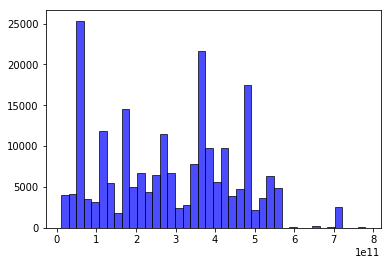

In [165]:
#绘制直方图
plt.hist(data.census_block_group, bins=40, facecolor="blue", edgecolor="black", alpha=0.7)

# wine-reviews数据预处理

In [166]:
data1=pd.read_csv("../datamining_dataset/winemag-data_first150k.csv")
data2=pd.read_csv("../datamining_dataset/winemag-data-130k-v2.csv")

In [167]:
data1.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude


In [168]:
data2.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


由于两个数据集的列不完全相同，只选择公有的、对数据预处理有用的列，并将两个数据集拼接为一个数据集
具体选择的列为：country(国家)、designation(名称)、points(得分)、price(价格)、variety(种类)、winery(酿酒厂)

In [169]:
data_wine1=data1[['country','designation','points','price','variety','winery']]
data_wine2=data2[['country','designation','points','price','variety','winery']]

In [170]:
data_wine1.shape

(150930, 6)

In [171]:
data_wine2.shape

(129971, 6)

In [172]:
#对两个数据集进行拼接，我们发现只有points和price两列是数值型数据
data_wine=pd.concat([data_wine1,data_wine2],axis = 0,ignore_index=True)

In [173]:
data_wine.head()

,country,designation,points,price,variety,winery
0,US,Martha's Vineyard,96,235.0,Cabernet Sauvignon,Heitz
1,Spain,Carodorum Selección Especial Reserva,96,110.0,Tinta de Toro,Bodega Carmen Rodríguez
2,US,Special Selected Late Harvest,96,90.0,Sauvignon Blanc,Macauley
3,US,Reserve,96,65.0,Pinot Noir,Ponzi
4,France,La Brûlade,95,66.0,Provence red blend,Domaine de la Bégude


Text(0,0.5,'number')

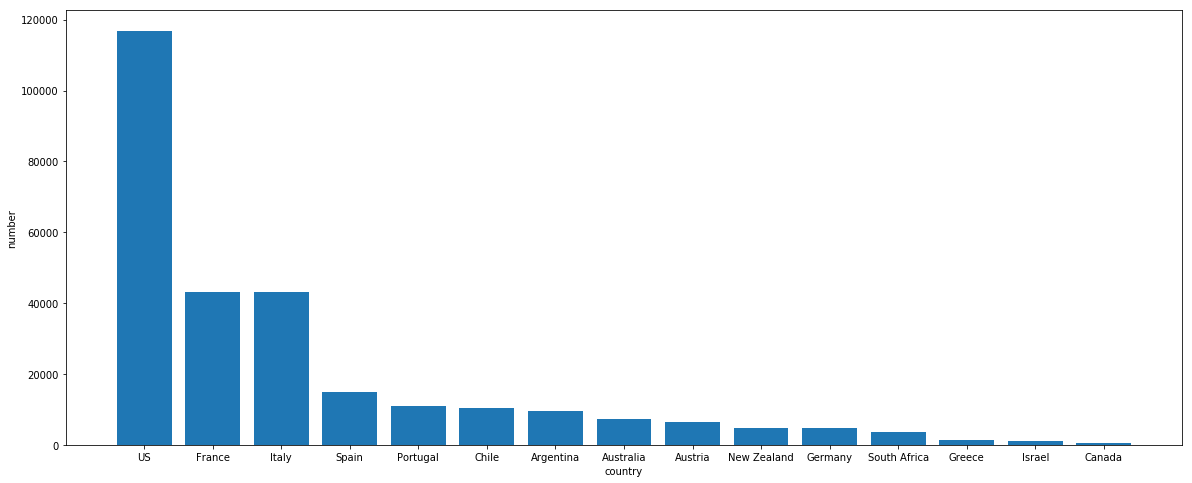

In [174]:
##统计聚会的频数的前15位
country_top15=data_wine.country.value_counts()[0:15]
plt.figure(figsize=(20, 8))
plt.bar(country_top15.index,country_top15)
plt.xlabel('country')
plt.ylabel('number')

In [175]:
#给出price一列的五数概括
data_wine.price.describe()

count    258210.000000
mean         34.177162
std          38.611708
min           4.000000
25%          16.000000
50%          25.000000
75%          40.000000
max        3300.000000
Name: price, dtype: float64

In [176]:
#统计每一列缺失值的个数  由于designation一列缺失的数据比较多，且它对我们要做的数据分析影响不大，故对designation一列的缺失值不做处理
data_wine.isnull().sum() 

country           68
designation    83200
points             0
price          22691
variety            1
winery             0
dtype: int64

In [177]:
#对于列country缺失的数据，选择直接将该行数据剔除
data_wine.drop(data_wine[data_wine['country'].isnull()].index ,inplace=True  )

In [178]:
#对于列variety缺失的数据，我们使用相同酿酒厂且相同得分且相同价格的数据的variety一列的值进行填充
data_wine[data_wine['variety'].isnull()]

,country,designation,points,price,variety,winery
237839,Chile,NaN,88,17.0,NaN,Carmen


In [179]:
data_temp=data_wine[data_wine['winery']=='Carmen']
data_temp=data_temp[data_temp['points']==88]
data_temp=data_temp[data_temp['price']==17.0]
data_temp

,country,designation,points,price,variety,winery
69386,Chile,Reserve,88,17.0,Cabernet Sauvignon,Carmen
150806,Chile,Reserve,88,17.0,Cabernet Sauvignon,Carmen
237839,Chile,NaN,88,17.0,NaN,Carmen
240557,Chile,Reserve,88,17.0,Cabernet Sauvignon,Carmen


In [180]:
#使用Cabernet Sauvignon值进行填充
data_wine.loc[237839,'variety']='Cabernet Sauvignon'

In [181]:
data_wine[data_wine.index==237839]

,country,designation,points,price,variety,winery
237839,Chile,NaN,88,17.0,Cabernet Sauvignon,Carmen


In [182]:
data_wine_priceIsNan=data_wine[data_wine['price'].isnull()]

通过分析数据发现列price的缺失值不能简单通过均值或者高频率值等方法填充，所以考虑将price缺失的这部分数据保存下来并从原数据集中剔除
将剔除这部分后的数据可作为训练集，这部分数据可作为测试集，可应用于价格预测的任务中

In [183]:
#对于列price缺失的数据，选择直接将该行数据剔除
data_wine.drop(data_wine_priceIsNan.index ,inplace=True  )

In [184]:
#至此除列designation外所有缺失值处理完毕
data_wine.isnull().sum()

country            0
designation    77079
points             0
price              0
variety            0
winery             0
dtype: int64

{'whiskers': [<matplotlib.lines.Line2D at 0x1e9db560e80>,
 'caps': [<matplotlib.lines.Line2D at 0x1e9db569828>,
 'boxes': [<matplotlib.lines.Line2D at 0x1e9db560d30>],
 'medians': [<matplotlib.lines.Line2D at 0x1e9db572128>],
 'fliers': [<matplotlib.lines.Line2D at 0x1e9db572588>],
 'means': []}

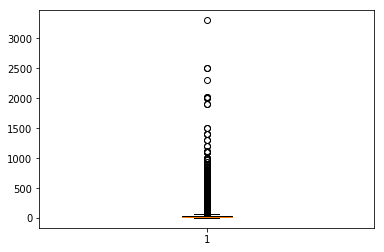

In [185]:
#对price列绘制盒图
plt.boxplot(data_wine.price)

(array([ 1278.,     0.,  2146.,     0.,  5705.,     0.,  8693.,     0.,
        16217.,     0., 20505.,     0., 26091.,     0., 34786.,     0.,
        32039.,     0., 22863.,     0., 28756.,     0., 19770.,     0.,
        16984.,     0., 11132.,     0.,  6456.,     0.,  2872.,     0.,
         1049.,     0.,   510.,     0.,   183.,     0.,    68.,    43.]),
 array([ 80. ,  80.5,  81. ,  81.5,  82. ,  82.5,  83. ,  83.5,  84. ,
         84.5,  85. ,  85.5,  86. ,  86.5,  87. ,  87.5,  88. ,  88.5,
         89. ,  89.5,  90. ,  90.5,  91. ,  91.5,  92. ,  92.5,  93. ,
         93.5,  94. ,  94.5,  95. ,  95.5,  96. ,  96.5,  97. ,  97.5,
         98. ,  98.5,  99. ,  99.5, 100. ]),
 <a list of 40 Patch objects>)

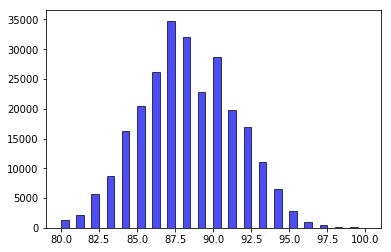

In [186]:
#对points列绘制直方图
plt.hist(data_wine.points, bins=40, facecolor="blue", edgecolor="black", alpha=0.7)